# API Funcional

In [37]:
from keras import optimizers
from keras import layers
from keras import models
from keras import losses
import numpy as np
import keras

In [47]:
%pylab inline
plt.style.use('seaborn-talk')

Populating the interactive namespace from numpy and matplotlib


In [16]:
x_test = np.linspace(100.01,110,1000)
y_test = 3*x_test + 2

In [26]:
m = models.Sequential()
m.add(layers.Dense(512, input_shape=(1,), activation='selu'))
m.add(layers.Dense(256, activation='selu'))
m.add(layers.Dense(512, activation='selu'))
m.add(layers.Dense(64, activation='selu'))
m.add(layers.Dense(512, activation='selu'))
m.add(layers.Dense(4, activation='selu'))
m.add(layers.Dense(1))

m.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 512)               1024      
_________________________________________________________________
dense_17 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_18 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_19 (Dense)             (None, 64)                32832     
_________________________________________________________________
dense_20 (Dense)             (None, 512)               33280     
_________________________________________________________________
dense_21 (Dense)             (None, 4)                 2052      
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 5         
Total para

In [29]:
x0 = layers.Input(shape=(1,), dtype='float32')
x1 = layers.Dense(512, activation='selu')(x0)
x2 = layers.Dense(256, activation='selu')(x1)
x3 = layers.Dense(512, activation='selu')(x2)
x4_input = layers.concatenate([x2, x3])
x4 = layers.Dense(64, activation='selu')(x4_input)
x5 = layers.Dense(512, activation='selu')(x4)
x6 = layers.Dense(4, activation='selu')(x5)
x7 = layers.Dense(1)(x6)

model = models.Model(inputs=x0, outputs=x7)

In [30]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
dense_30 (Dense)                (None, 512)          1024        input_2[0][0]                    
__________________________________________________________________________________________________
dense_31 (Dense)                (None, 256)          131328      dense_30[0][0]                   
__________________________________________________________________________________________________
dense_32 (Dense)                (None, 512)          131584      dense_31[0][0]                   
__________________________________________________________________________________________________
concatenat

## Polinomial aproximattion 
* x_linear 64,32,16,8
* x_square 64,32,16,8
* x_cubic 64,32,16,8
* concatenate output 63,32,16,8

In [158]:
x_train = np.linspace(0, 5*np.pi, 90000)
y_train = cos(x_train)
x_test = np.linspace(5*np.pi,4*np.pi, 10000)
y_test = cos(x_test)

In [136]:
y_test

array([-1.        , -0.99999995, -0.9999998 , ...,  0.9999998 ,
        0.99999995,  1.        ])

In [159]:
x0lin = layers.Input(shape=(1,), dtype='float32')
x1lin = layers.Dense(64, activation='selu')(x0lin)
x2lin = layers.Dense(32, activation='selu')(x1lin)
x3lin = layers.Dense(16, activation='selu')(x2lin)
x4lin = layers.Dense(8, activation='selu')(x3lin)

x0sq = layers.Input(shape=(1,), dtype='float32')
x1sq = layers.Dense(64, activation='selu')(x0sq)
x2sq = layers.Dense(32, activation='selu')(x1sq)
x3sq = layers.Dense(16, activation='selu')(x2sq)
x4sq = layers.Dense(8, activation='selu')(x3sq)

x0cu = layers.Input(shape=(1,), dtype='float32')
x1cu = layers.Dense(64, activation='selu')(x0cu)
x2cu = layers.Dense(32, activation='selu')(x1cu)
x3cu = layers.Dense(16, activation='selu')(x2cu)
x4cu = layers.Dense(8, activation='selu')(x3cu)

x4sqcu = layers.concatenate([x4lin, x4sq, x4cu])

x1 = layers.Dense(64, activation='selu')(x4sqcu)
x2 = layers.Dense(32, activation='selu')(x1)
x3 = layers.Dense(16, activation='selu')(x2)
x4 = layers.Dense(1)(x3)

model = models.Model(inputs=[x0lin,x0sq,x0cu], outputs=x4)

model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_45 (InputLayer)           (None, 1)            0                                            
__________________________________________________________________________________________________
input_46 (InputLayer)           (None, 1)            0                                            
__________________________________________________________________________________________________
input_47 (InputLayer)           (None, 1)            0                                            
__________________________________________________________________________________________________
dense_240 (Dense)               (None, 64)           128         input_45[0][0]                   
__________________________________________________________________________________________________
dense_244 

In [161]:
model.compile(optimizer=optimizers.Adam(),
              loss=losses.MAE)

In [162]:
h1 = model.fit([x_train, x_train**2, x_train**3], y_train, epochs = 200, batch_size=256, validation_split=0.2)

Train on 72000 samples, validate on 18000 samples
Epoch 1/200
72000/72000 [==============================] - 3s 43us/step - loss: 0.1434 - val_loss: 3.0713
Epoch 2/200
72000/72000 [==============================] - 1s 17us/step - loss: 0.0589 - val_loss: 2.7454
Epoch 3/200
72000/72000 [==============================] - 1s 17us/step - loss: 0.0467 - val_loss: 2.5954
Epoch 4/200
72000/72000 [==============================] - 1s 17us/step - loss: 0.0511 - val_loss: 2.3081
Epoch 5/200
72000/72000 [==============================] - 1s 17us/step - loss: 0.0454 - val_loss: 2.0741
Epoch 6/200
72000/72000 [==============================] - 1s 17us/step - loss: 0.0408 - val_loss: 1.7128
Epoch 7/200
72000/72000 [==============================] - 1s 18us/step - loss: 0.0444 - val_loss: 2.1959
Epoch 8/200
72000/72000 [==============================] - 1s 18us/step - loss: 0.0391 - val_loss: 1.7721
Epoch 9/200
72000/72000 [==============================] - 1s 17us/step - loss: 0.0343 - val_loss: 1.5

72000/72000 [==============================] - 1s 16us/step - loss: 0.0091 - val_loss: 0.6634
Epoch 154/200
72000/72000 [==============================] - 1s 17us/step - loss: 0.0088 - val_loss: 0.7239
Epoch 155/200
72000/72000 [==============================] - 1s 16us/step - loss: 0.0090 - val_loss: 0.6559
Epoch 156/200
72000/72000 [==============================] - 1s 16us/step - loss: 0.0084 - val_loss: 0.6542
Epoch 157/200
72000/72000 [==============================] - 1s 16us/step - loss: 0.0073 - val_loss: 0.7566
Epoch 158/200
72000/72000 [==============================] - 1s 16us/step - loss: 0.0092 - val_loss: 0.7140
Epoch 159/200
72000/72000 [==============================] - 1s 17us/step - loss: 0.0087 - val_loss: 0.6568
Epoch 160/200
72000/72000 [==============================] - 1s 16us/step - loss: 0.0092 - val_loss: 0.6453
Epoch 161/200
72000/72000 [==============================] - 1s 16us/step - loss: 0.0086 - val_loss: 0.6642
Epoch 162/200
72000/72000 [===============

In [154]:
def plot_metric(history, metric):
    history_dict = history.history
    values = history_dict[metric]
    if 'val_' + metric in history_dict.keys():  
        val_values = history_dict['val_' + metric]

    epochs = range(1, len(values) + 1)

    if 'val_' + metric in history_dict.keys():  
        plt.plot(epochs, val_values, label='Validation')
    plt.semilogy(epochs, values, label='Training')

    if 'val_' + metric in history_dict.keys():  
        plt.title('Training and validation %s' % metric)
    else:
        plt.title('Training %s' % metric)
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.grid()

    plt.show()  

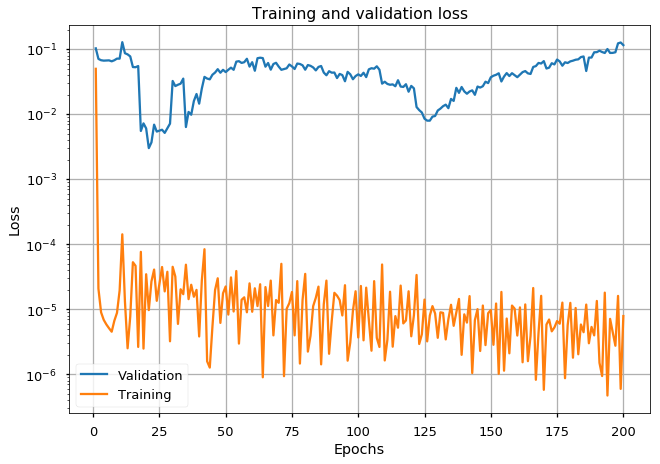

In [155]:
plot_metric(h1, 'loss')

In [156]:
y_train_pred = model.predict([x_train, x_train**2, x_train**3])
y_pred = model.predict([x_test, x_test**2, x_test**3])

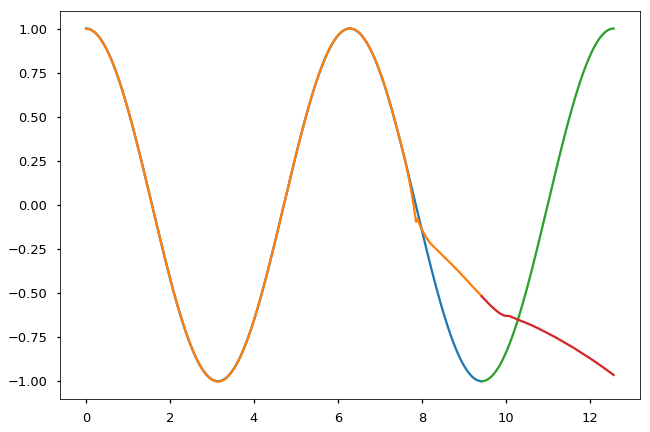

In [157]:
plt.plot(x_train, y_train)
plt.plot(x_train, y_train_pred)
plt.plot(x_test, y_test)
plt.plot(x_test, y_pred)

In [146]:
x_train_norm = (x_train - np.mean(x_train))/np.std(x_train)
y_train_norm = (y_train - np.mean(y_train))/np.std(y_train)

x_test_norm = (x_test - np.mean(x_train))/np.std(x_train)
y_test_norm = (y_test - np.mean(y_train))/np.std(y_train)

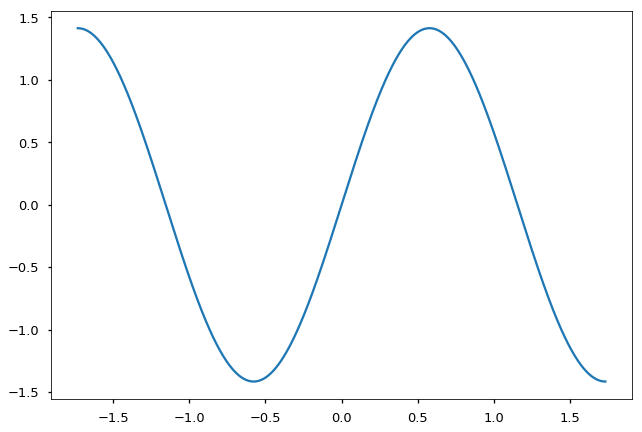

In [147]:
plt.plot(x_train_norm, y_train_norm)

In [149]:
h2 = model.fit([x_train_norm, x_train_norm**2, x_train_norm**3], y_train_norm, epochs = 30, batch_size=256, validation_split=0.2)

Train on 72000 samples, validate on 18000 samples
Epoch 1/30
72000/72000 [==============================] - 1s 17us/step - loss: 0.0484 - val_loss: 0.9305
Epoch 2/30
72000/72000 [==============================] - 1s 17us/step - loss: 0.0123 - val_loss: 0.8171
Epoch 3/30
72000/72000 [==============================] - 1s 17us/step - loss: 0.0100 - val_loss: 0.7978
Epoch 4/30
72000/72000 [==============================] - 1s 17us/step - loss: 0.0079 - val_loss: 0.8636
Epoch 5/30
72000/72000 [==============================] - 1s 17us/step - loss: 0.0062 - val_loss: 0.8560
Epoch 6/30
72000/72000 [==============================] - 1s 17us/step - loss: 0.0056 - val_loss: 0.8633
Epoch 7/30
72000/72000 [==============================] - 1s 17us/step - loss: 0.0051 - val_loss: 0.9027
Epoch 8/30
72000/72000 [==============================] - 1s 17us/step - loss: 0.0044 - val_loss: 0.9669
Epoch 9/30
72000/72000 [==============================] - 1s 17us/step - loss: 0.0037 - val_loss: 1.0065
Epoch